# Chapter 15: Hands on CNN for Classification

***

Epoch 1/10
375/375 [==============================] - 13s 35ms/step - loss: 0.2472 - accuracy: 0.9260 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 2/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 3/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0433 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0425 - val_accuracy:

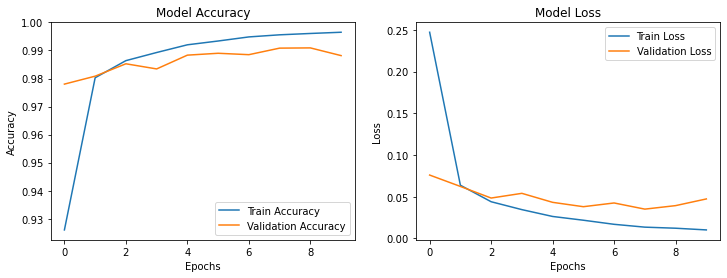

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the dataset to add a channel dimension and normalize pixel values
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

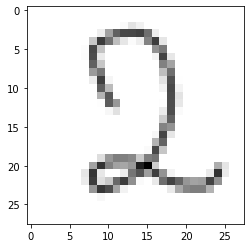

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './images/2_digit.png'
img = Image.open(image_path)

# Convert to grayscale (if not already)
img = img.convert('L')

# Resize to 28x28 pixels (the size expected by the MNIST model)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the pixel values (divide by 255 to get values between 0 and 1)
img_array = img_array / 255.0

# If the model expects 4D input (batch_size, height, width, channels), add an extra dimension
img_array = img_array.reshape(1, 28, 28, 1)  # 1 image, 28x28 size, 1 channel (grayscale)

# Display the preprocessed image (optional, just to check)
plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
plt.show()

In [7]:
# Assuming you have a trained model, for example:
# from tensorflow.keras.models import load_model
# model = load_model('your_model.h5')

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class (the digit with the highest probability)
predicted_class = np.argmax(prediction, axis=1)

print(f"The predicted digit is: {predicted_class[0]}")

The predicted digit is: 2
